In [1]:
import os
os.getcwd()

'/Users/yuechenjiang/Desktop/CatMemo/Final_result'

In [2]:
cd TopK

/Users/yuechenjiang/Desktop/CatMemo/Final_result/TopK


In [3]:
import pandas as pd
df_top1 = pd.read_csv('TSLA_top1.csv') # 2022-04-04 - 2022-12-27
df_top3 = pd.read_csv('TSLA_top3.csv') # 2022-04-04 - 2022-12-27
df_top5 = pd.read_csv('TSLA_top5.csv') # 2022-04-04 - 2022-12-27
df_top10 = pd.read_csv('TSLA_top10.csv') # 2022-04-04 - 2022-12-27

In [4]:
import yfinance as yf
Start = '2022-06-16'
End = '2022-12-28'
Ticker = 'TSLA'
df = yf.download(Ticker, start=Start, end=End)
price = df['Adj Close'].tolist()

[*********************100%%**********************]  1 of 1 completed


In [5]:
df_top1['date'] = pd.to_datetime(df_top1['date'])
df_top3['date'] = pd.to_datetime(df_top3['date'])
df_top5['date'] = pd.to_datetime(df_top5['date'])
df_top10['date'] = pd.to_datetime(df_top10['date'])
top1 = df_top1[(df_top1['date'] >= Start) & (df_top1['date'] < End)]['direction'].tolist()
top3 = df_top3[(df_top3['date'] >= Start) & (df_top3['date'] < End)]['direction'].tolist()
top5 = df_top5[(df_top5['date'] >= Start) & (df_top5['date'] < End)]['direction'].tolist()
top10 = df_top10[(df_top10['date'] >= Start) & (df_top10['date'] < End)]['direction'].tolist()

/var/folders/kg/pwzs55h51hb6x5vbsqjvxhjc0000gn/T/ipykernel_76528/2578254319.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_top1['date'] = pd.to_datetime(df_top1['date'])
/var/folders/kg/pwzs55h51hb6x5vbsqjvxhjc0000gn/T/ipykernel_76528/2578254319.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_top3['date'] = pd.to_datetime(df_top3['date'])
/var/folders/kg/pwzs55h51hb6x5vbsqjvxhjc0000gn/T/ipykernel_76528/2578254319.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_top5['date'] = pd.to_datetime(df_top5['date'])
/var/folders/kg/pwzs55h51hb6x5vbsqjvxhjc0000gn

In [6]:
import numpy as np
def reward_list(price, actions):
    reward = 0
    reward_list = [0]
    for i in range(len(price)-1):
        reward += actions[i] * np.log(price[i+1]/price[i])
        reward_list.append(reward)
    return reward_list

In [7]:
B_H = [1] * 496
B_H_rw = reward_list(price, B_H)
top1_rw = reward_list(price, top1)
top3_rw = reward_list(price, top3)
top5_rw = reward_list(price, top5)
top10_rw = reward_list(price, top10)

In [8]:
Date = df_top5[(df_top5['date'] >= Start) & (df_top5['date'] < End)]['date'].tolist()
len(Date)

134

In [9]:
len(top1_rw)

134

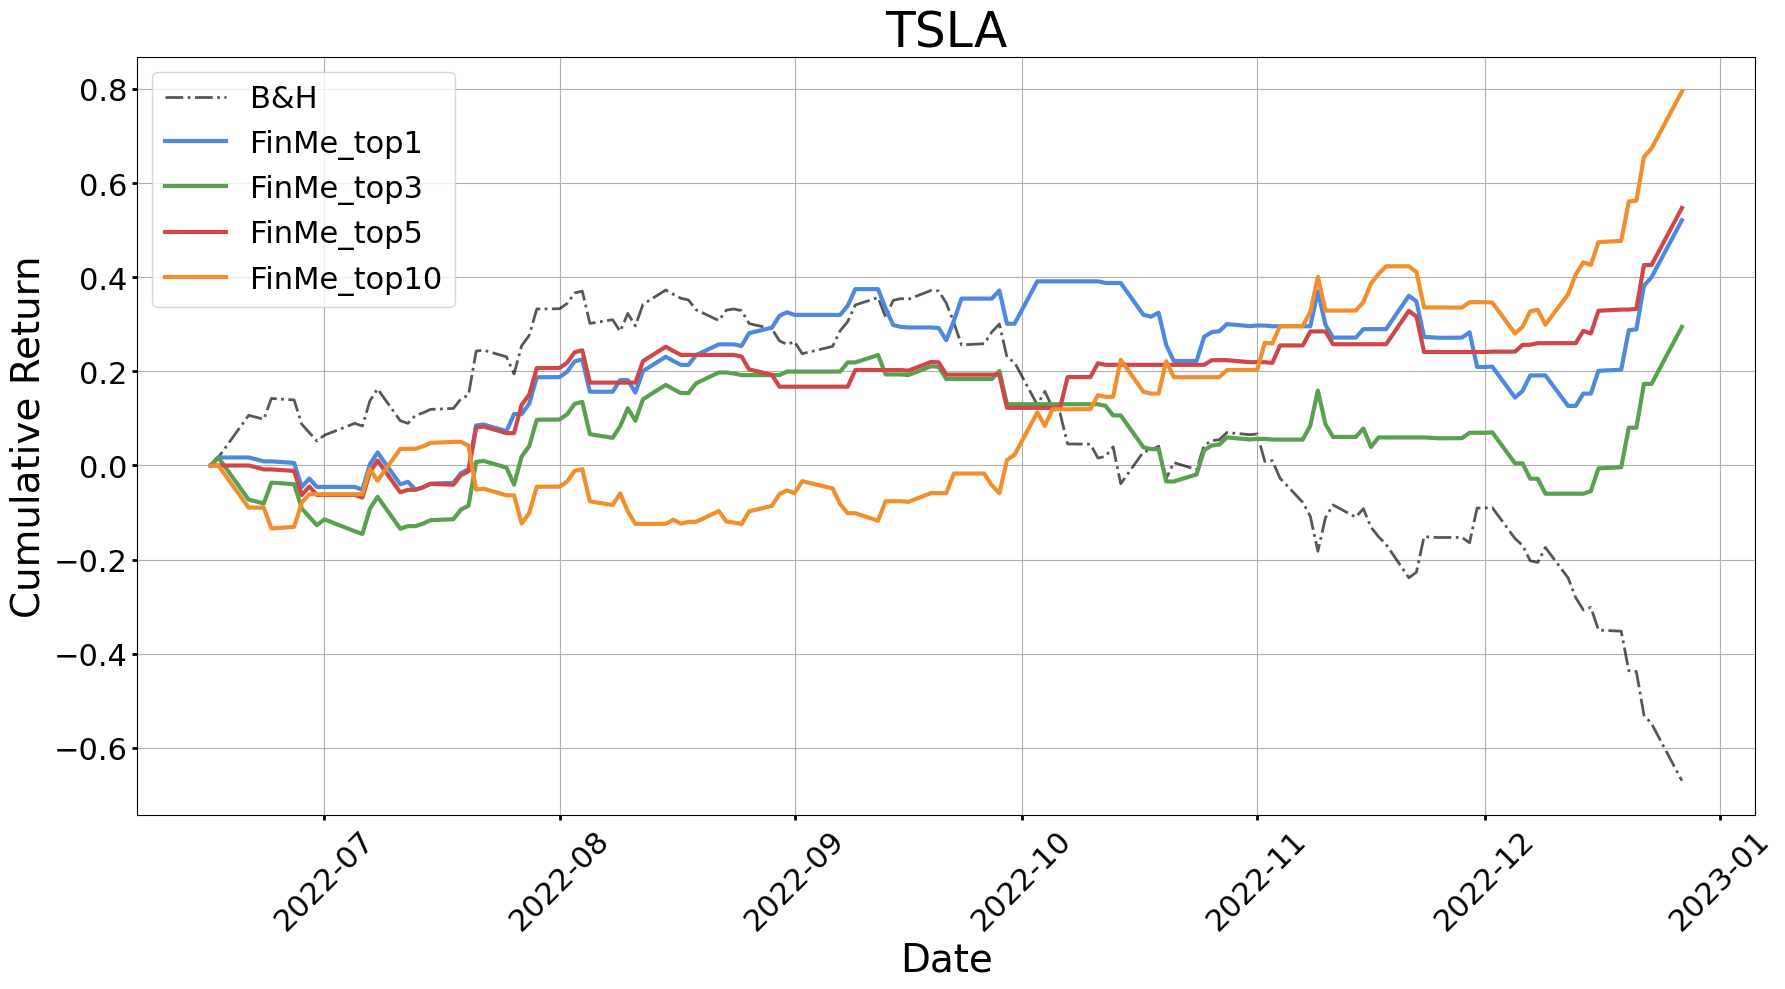

In [10]:
import matplotlib.pyplot as plt
import datetime

dates = pd.to_datetime(Date).tolist()
fig, ax = plt.subplots(figsize=(18, 10))

# Plotting the three lists
plt.plot(dates, B_H_rw, linewidth=2, label='B&H', color = '#000', linestyle = '-.', alpha = 0.66)
plt.plot(dates, top1_rw, linewidth=3, label='FinMe_top1', color = '#4e89e0')
plt.plot(dates, top3_rw, linewidth=3, label='FinMe_top3', color = '#59a14f')
plt.plot(dates, top5_rw, linewidth=3, label='FinMe_top5', color = '#d14749')
plt.plot(dates, top10_rw, linewidth=3, label='FinMe_top10', color = '#f28e2b')


# Set the labels and title
ax.set_xlabel('Date', fontsize=28)
ax.set_ylabel('Cumulative Return', fontsize=28)
plt.title(Ticker, fontsize=35)

# Customize the legend
ax.legend(fontsize=22, frameon=True)

# Customize the grid
ax.grid(True)

# Customize the tick labels on both axes
ax.tick_params(axis='x', labelsize=22, width=2, rotation=45)  # Rotate x-axis labels
ax.tick_params(axis='y', labelsize=22, width=2)  # y-axis labels

# Apply tight layout to ensure everything fits without overlapping
plt.tight_layout()

plt.savefig('TSLA_Top-K.png', format='png', dpi=300)
# Show the plot
plt.show()

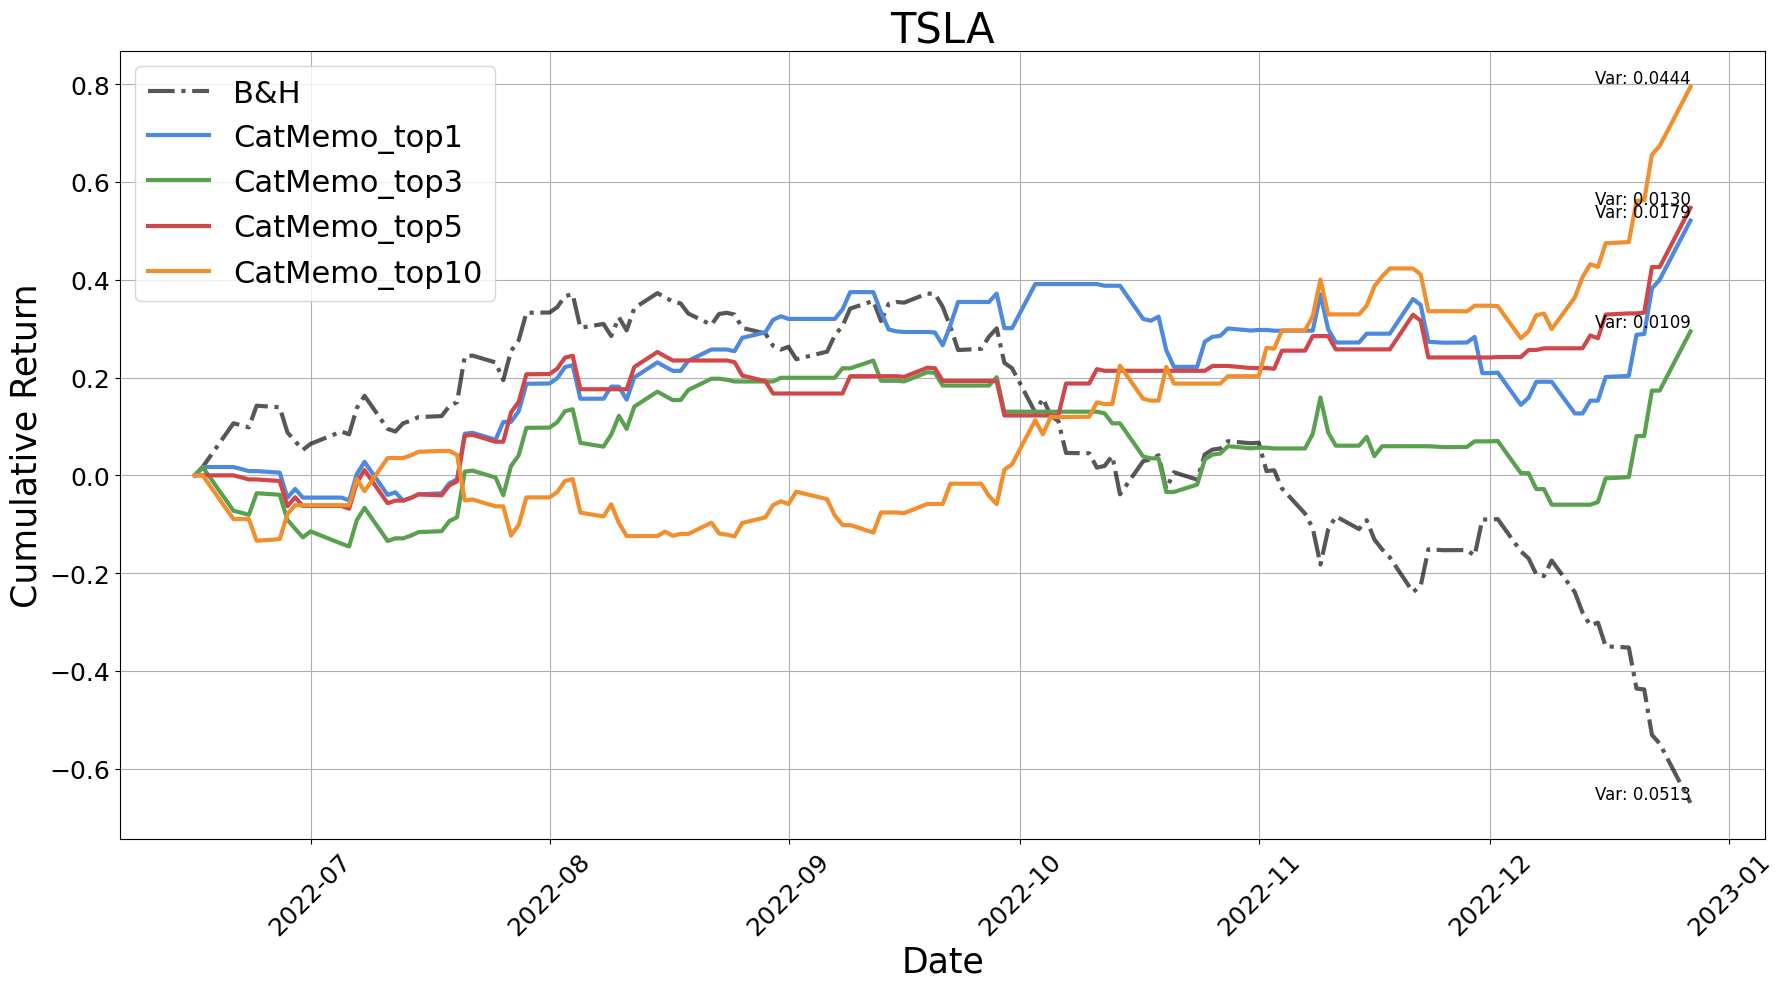

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming Date, B_H_rw, top1_rw, top3_rw, top5_rw, top10_rw, and Ticker are defined earlier in your code

dates = pd.to_datetime(Date).tolist()
plt.figure(figsize=(18, 10))

# Plotting the three lists with their variances
lines = {
    'B&H': {'data': B_H_rw, 'color': '#000', 'linestyle': '-.', 'alpha': 0.66},
    'CatMemo_top1': {'data': top1_rw, 'color': '#4e89e0'},
    'CatMemo_top3': {'data': top3_rw, 'color': '#59a14f'},
    'CatMemo_top5': {'data': top5_rw, 'color': '#d14749'},
    'CatMemo_top10': {'data': top10_rw, 'color': '#f28e2b'}
}

for label, info in lines.items():
    plt.plot(dates, info['data'], linewidth=3, label=label, color=info['color'], linestyle=info.get('linestyle', '-'), alpha=info.get('alpha', 1))
    variance = np.var(info['data'])
    # Printing the variance on the plot
    plt.text(dates[-1], info['data'][-1], f'Var: {variance:.4f}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Adding labels, title, legend, and making the layout tight with adjusted font sizes
plt.xlabel('Date', fontsize=25)
plt.ylabel('Cumulative Return', fontsize=25)
plt.title(Ticker, fontsize=30)
plt.legend(fontsize=22)
plt.grid(True)
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.tight_layout()

plt.savefig('TSLA_Top-K_var.png')
# Show the plot
plt.show()


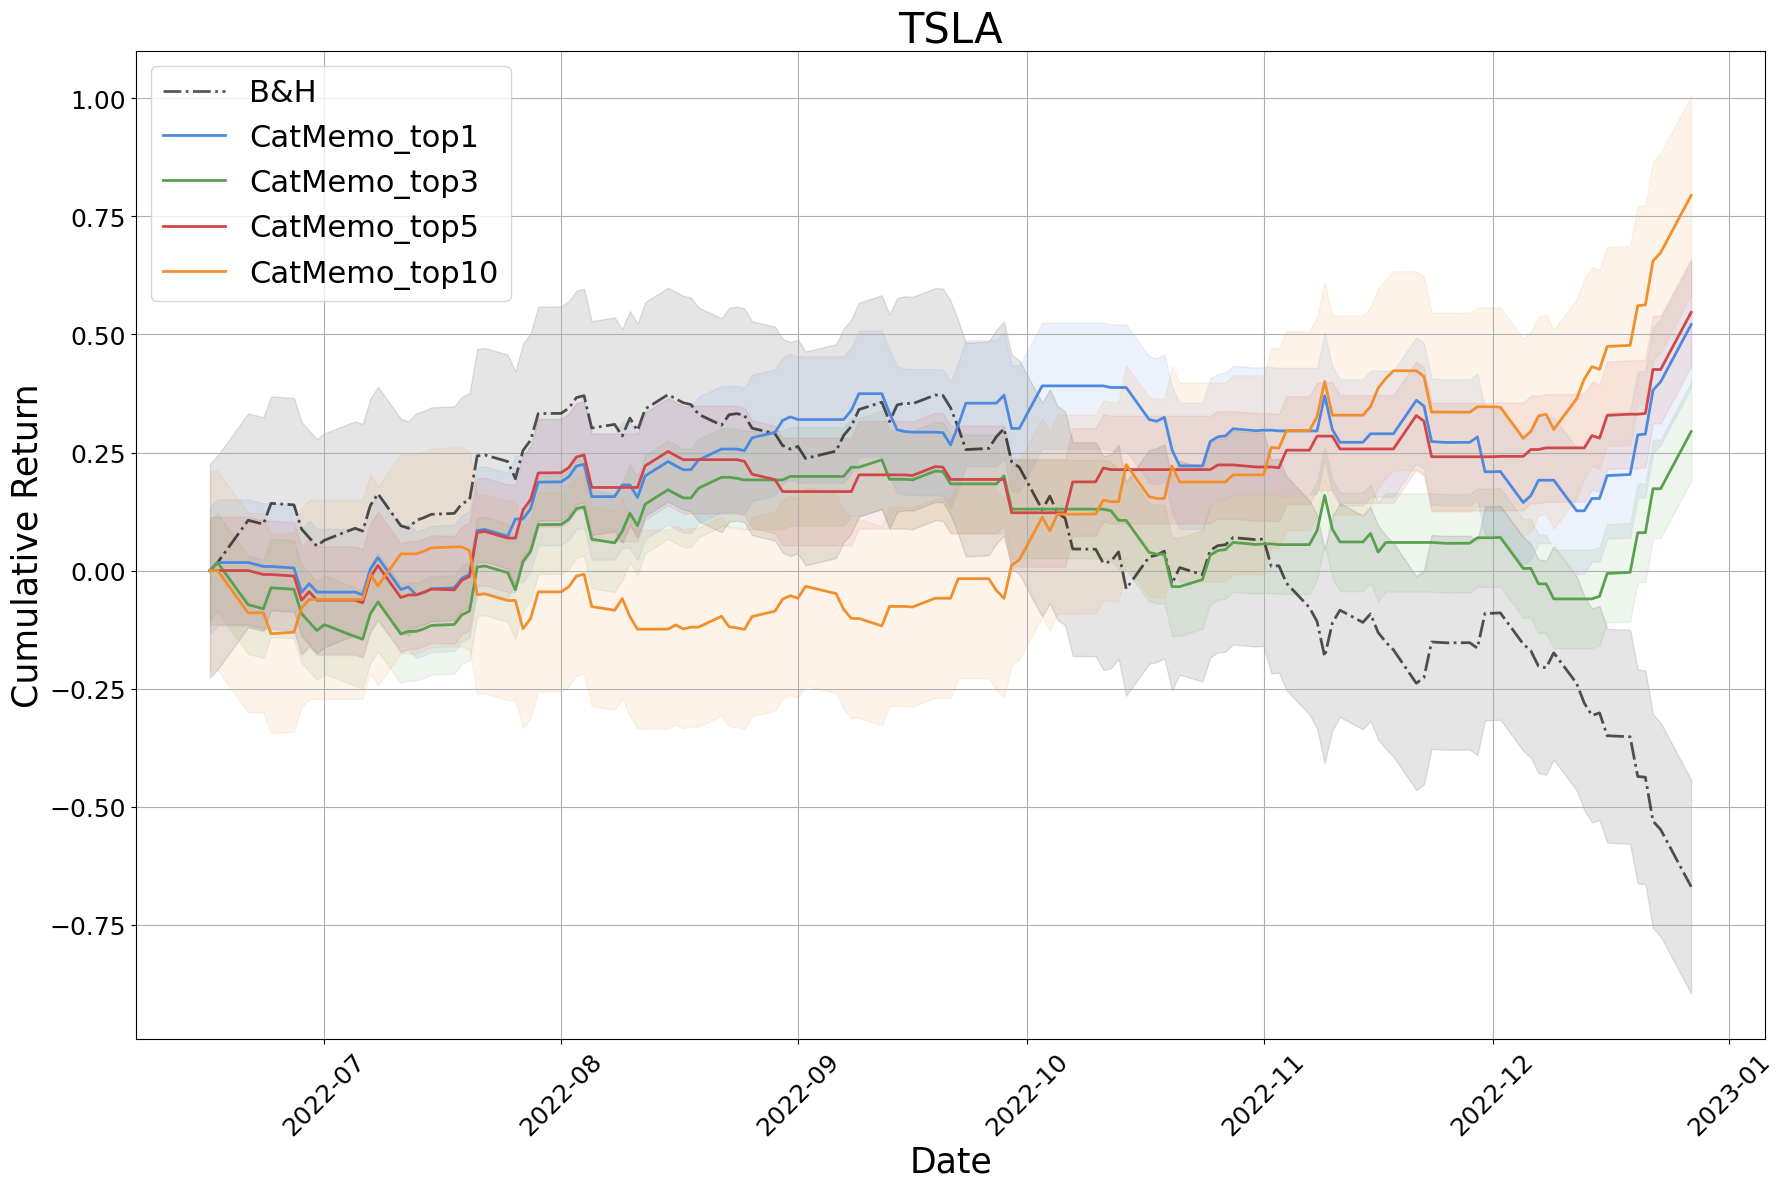

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dates = pd.to_datetime(Date).tolist()
plt.figure(figsize=(18, 12))

# Define a function to calculate and plot the variance as a shaded area
def plot_with_variance(x, y, label, color, linestyle, a, linewidth=2):
    variance = np.var(y)
    std_deviation = np.sqrt(variance)
    plt.plot(x, y, label=label, color=color, linestyle = linestyle,  alpha = a, linewidth=linewidth)
    plt.fill_between(x, y - std_deviation, y + std_deviation, color=color, alpha=0.1)

# Plot each line with variance visualization
plot_with_variance(dates, B_H_rw, 'B&H', '#000', linestyle = '-.', a = 0.66)
plot_with_variance(dates, top1_rw, 'CatMemo_top1', '#4e89e0', linestyle = '-', a = 1)
plot_with_variance(dates, top3_rw, 'CatMemo_top3', '#59a14f', linestyle = '-', a = 1)
plot_with_variance(dates, top5_rw, 'CatMemo_top5', '#d14749', linestyle = '-', a = 1) 
plot_with_variance(dates, top10_rw, 'CatMemo_top10', '#f28e2b', linestyle = '-', a = 1)

# Adding labels, title, legend, and making the layout tight with adjusted font sizes
plt.xlabel('Date', fontsize=25)
plt.ylabel('Cumulative Return', fontsize=25)
plt.title(Ticker, fontsize=30)
plt.legend(fontsize=22)
plt.grid(True)
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.tight_layout()

plt.savefig('TSLA_Top-K_with_Var.png')
# Show the plot
plt.show()
